In [1]:
import numpy as np # para algebra linear
import pandas as pd # processamento de dados, arquivos CSV I/O (expl: pd.read_csv)

In [2]:
# Carregando o dataset Iris Flowers
data = pd.read_csv('dia_sorte.csv', sep = ';')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669 entries, 0 to 668
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   concurso  669 non-null    int64 
 1   data      669 non-null    object
 2   bola1     669 non-null    int64 
 3   bola2     669 non-null    int64 
 4   bola3     669 non-null    int64 
 5   bola4     669 non-null    int64 
 6   bola5     669 non-null    int64 
 7   bola6     669 non-null    int64 
 8   bola7     669 non-null    int64 
 9   mes       668 non-null    object
dtypes: int64(8), object(2)
memory usage: 52.4+ KB


In [4]:
# Somente o que irei utilizar
data = data.loc[:,["data","bola1","bola2","bola3","bola4","bola5","bola6", "bola7"] ]

In [5]:
data

,data,bola1,bola2,bola3,bola4,bola5,bola6,bola7
0,15/10/2022,15,1,4,22,11,24,14
1,13/10/2022,31,24,17,7,1,11,5
2,11/10/2022,11,12,20,24,29,4,28
3,08/10/2022,29,8,5,27,24,6,28
4,06/10/2022,12,31,8,14,16,10,15
...,...,...,...,...,...,...,...,...
664,29/05/2018,2,8,9,17,24,19,28
665,26/05/2018,15,19,7,13,29,6,18
666,24/05/2018,11,25,28,12,21,29,24
667,22/05/2018,12,28,21,8,11,14,20


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

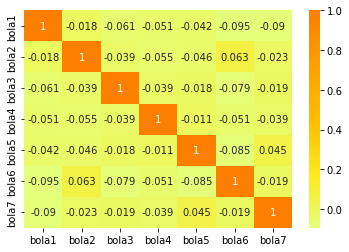

In [7]:
sns.heatmap(data.corr(), cmap = 'Wistia', annot = True)
plt.show()

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x = data.drop(["data","bola2","bola3","bola4","bola5","bola6", "bola7"], axis = 1)
y = data['bola1']

In [10]:
x_train, x_test, y_train, y_test = train_test_split (x,y,test_size = 0.3, random_state = 1)

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import numpy as np

In [12]:
# Treino IA

lin_reg = LinearRegression()
lin_reg.fit (x_train, y_train)

rf_reg = RandomForestRegressor()
rf_reg.fit (x_train, y_train)

RandomForestRegressor()

In [13]:
# Teste IA

test_pred_lin = lin_reg.predict (x_test)
test_pred_rf = rf_reg.predict (x_test)

r2_lin = metrics.r2_score (y_test, test_pred_lin)
rmse_lin = np.sqrt(metrics.mean_squared_error(y_test, test_pred_lin))

print(f"R² da Regressão Linear: {r2_lin}")
print(f"RSME da Regressão Linear: {rmse_lin}")

r2_rf=metrics.r2_score(y_test, test_pred_rf)
rmse_rf=np.sqrt(metrics.mean_squared_error(y_test, test_pred_rf))

print(f"R² da Random Forest: {r2_rf}")
print(f"RSME do Random Forest: {rmse_rf}")

R² da Regressão Linear: 1.0
RSME da Regressão Linear: 3.369439317057623e-15
R² da Random Forest: 1.0
RSME do Random Forest: 0.0


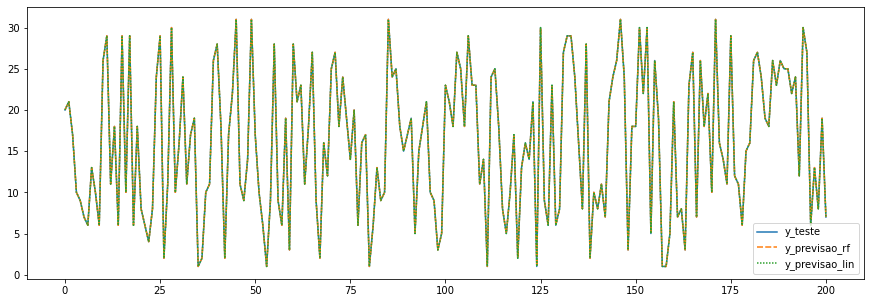

,y_teste,y_previsao_rf,y_previsao_lin
0,20,20.0,20.0
1,21,21.0,21.0
2,17,17.0,17.0
3,10,10.0,10.0
4,9,9.0,9.0
...,...,...,...
196,6,6.0,6.0
197,13,13.0,13.0
198,8,8.0,8.0
199,19,19.0,19.0


In [14]:
df_resultado = pd.DataFrame()
df_resultado['y_teste'] = y_test
df_resultado['y_previsao_rf'] = test_pred_rf
df_resultado['y_previsao_lin'] = test_pred_lin
df_resultado = df_resultado.reset_index(drop=True)
fig = plt.figure(figsize=(15, 5))
sns.lineplot(data=df_resultado)
plt.show()
display(df_resultado)